# Klasifikasi Kesehatan Tanaman Berdasarkan Citra Daun 

Pengenalan Pola - KOM - Kelompok 6

Github: https://github.com/hadhaz/tugas_pp

# Preparation

## Import Library

In [ ]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from IPython.display import Image
from PIL import Image as PILImage
import cv2

## Load Data

In [ ]:
TEST_PATH = './data/test.csv'
TRAIN_PATH = './data/train.csv'
IMAGE_PATH = './data/images/' 

train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

## Data Analysis & Exploration

In [ ]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


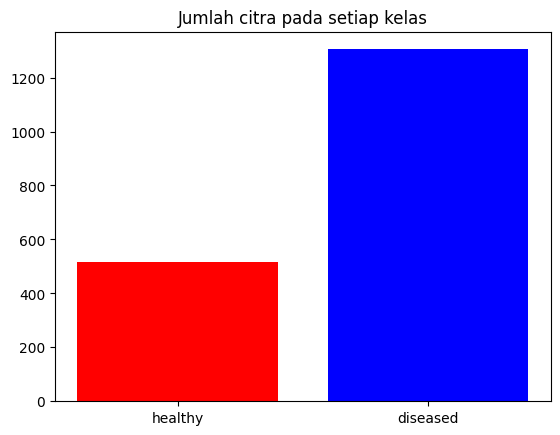

In [ ]:
# Count the number of images in each class
healthy = np.sum(train['healthy'])
multiple_diseases = np.sum(train['multiple_diseases'])
rust = np.sum(train['rust'])
scab = np.sum(train['scab'])
# Group the diseased leafs to a single class
diseased = multiple_diseases + rust + scab

# Bar plot
plt.bar(['healthy', 'diseased'], [healthy, diseased])
plt.bar(['healthy', 'diseased'], [healthy, diseased], color=['red', 'blue'])
plt.title('Jumlah citra pada setiap kelas')
plt.show()

In [ ]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [ ]:
def load_image(image_name):
    image_name = image_name + ".jpg"
    image_path = os.path.join(IMAGE_PATH, image_name)
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

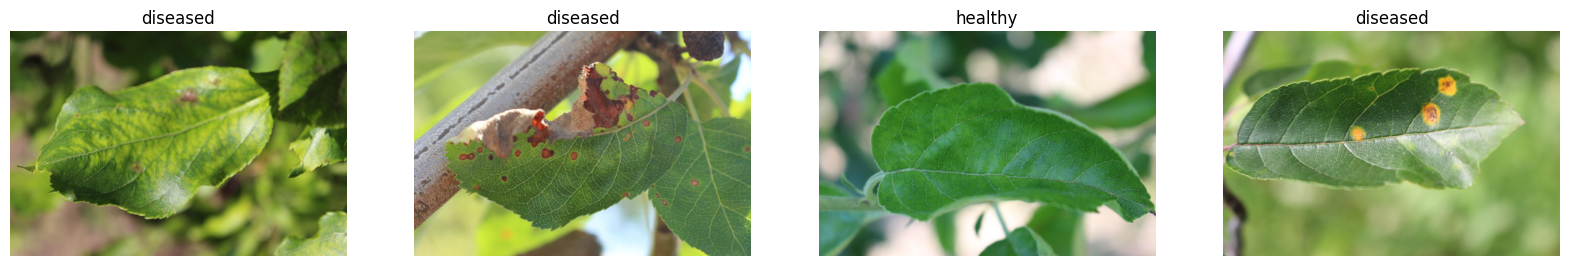

In [ ]:
# Display example images from each class
fig, ax = plt.subplots(1, 4, figsize=(20, 10))

for i in range(4):
    label = ''.join(train.columns[train.iloc[i].values == 1])
    if label != 'healthy':
        label = 'diseased'
    ax[i].imshow(load_image(train.iloc[i]['image_id']))
    ax[i].set_title(label)
    ax[i].axis('off')

plt.show()

# Data Preprocessing

## Histogram Equalization

In [ ]:
def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

    # Apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to the Y channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0])

    # Convert the image back to RGB format
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

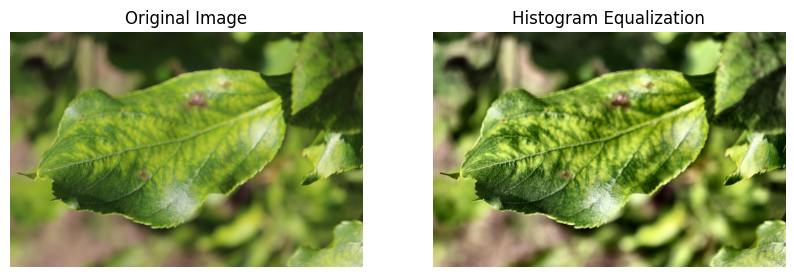

In [ ]:
# Display preprocessed images using histogram equalization
img = load_image(train.iloc[0]['image_id'])

preprocessed_img = histogram_equalization(img)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(preprocessed_img)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')

plt.show()

## Image Segmentation

In [ ]:
def init_grabcut_mask(h, w):
    mask = np.ones((h, w), np.uint8) * cv2.GC_PR_BGD
    mask[h//4:3*h//4, w//4:3*w//4] = cv2.GC_PR_FGD
    mask[2*h//5:3*h//5, 2*w//5:3*w//5] = cv2.GC_FGD
    return mask

def remove_background(image):
    h, w = image.shape[:2]
    mask = init_grabcut_mask(h, w)
    bgm = np.zeros((1, 65), np.float64)
    fgm = np.zeros((1, 65), np.float64)
    cv2.grabCut(image, mask, None, bgm, fgm, 1, cv2.GC_INIT_WITH_MASK)
    mask_binary = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    result = cv2.bitwise_and(image, image, mask = mask_binary)
    return result

def preprocess_image(image):
    image = histogram_equalization(image)
    image = remove_background(image)
    return image

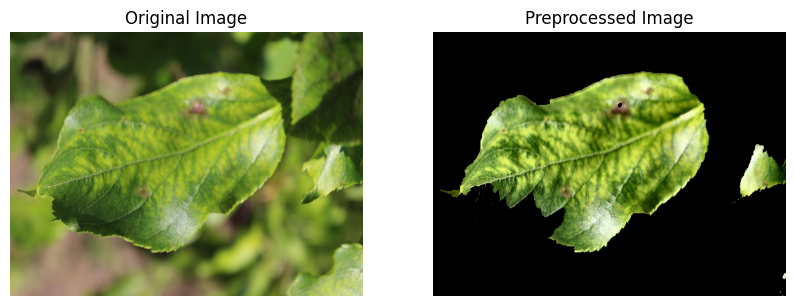

In [ ]:
# Display segmented images 
img = load_image(train.iloc[0]['image_id'])
img = cv2.resize(img, (640, 480))

preprocessed_img = preprocess_image(img)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(preprocessed_img)
ax[1].set_title('Preprocessed Image')
ax[1].axis('off')

plt.show()

### Save Segmented Image (Optional)
Data hasil segmentasi gambar sudah disediakan melalui tautan [Github](https://github.com/hadhaz/tugas_pp)

In [ ]:
output_directory = './data/preprocessed_images/'

In [ ]:
os.makedirs(output_directory + "train", exist_ok=True)
os.makedirs(output_directory + "test", exist_ok=True)

# Preprocess all images (histogram equalization + background removal)
def preprocess_images(df, category):
    for i in range(len(df)):
        image = load_image(df.iloc[i]['image_id'])
        image = cv2.resize(image, (640, 480))
        image = preprocess_image(image)

        cv2.imwrite(f'{output_directory}{category}/{df.iloc[i]["image_id"]}.jpg', image)
        print(i, end=" ")

preprocess_images(train, "train")
# preprocess_images(test, "test")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

# Data Augmentation (Optional)

In [ ]:
# Fitting CNN to images
import keras.preprocessing.image as ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                     shear_range=0.2,
#                                     zoom_range=0.2,
#                                     horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# training_set = train_datagen.flow_from_directory('./data/preprocessed_images/train/',
#                                                  target_size=(64, 64),
#                                                  batch_size=32,
#                                                  class_mode='binary')

test_set = test_datagen.flow_from_directory('./data/preprocessed_images/test/',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Augment class for df["multiple_diseases"] = 1 using datagen
def augment_multiple_diseases(df):
    datagen = ImageDataGenerator(
        rotation_range=360,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    for i in range(len(df)):
        if df.iloc[i]['multiple_diseases'] == 1:
            image = load_image(df.iloc[i]['image_id'])
            # resize image
            image = cv2.resize(image, (640, 480))
            image = preprocess_image(image)
            image = image.reshape((1,) + image.shape)

            j = 0
            # Create the target directory if it doesn't exist
            save_dir = './data/augmented/train'
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)

            # generate 3 images 
            for batch in datagen.flow(image, batch_size=1, save_to_dir=save_dir, save_prefix="Train", save_format='jpg'):
                j += 1
                # label to df and df["multiple_diseases"] = 1
                df = df.append({'image_id': df.iloc[i]['image_id'], 'multiple_diseases': 1}, ignore_index=True)
                if j >= 3:
                    break

augment_multiple_diseases(train)

In [ ]:
# append all augmented images to train
for filename in os.listdir('./data/augmented/train'):
    if filename.endswith(".jpg"):
        print(filename[:-4])
        # train = train.append({'image_id': filename[:-4], 'multiple_diseases': 1}, ignore_index=True)

# normalize nan values
# train = train.fillna(0)

# Feature Extraction
File CSV sudah disediakan melalui tautan [Github](https://github.com/hadhaz/tugas_pp/data)

In [ ]:
from skimage.feature import graycomatrix, graycoprops
from skimage.feature import local_binary_pattern
from skimage.measure import moments, moments_central, moments_normalized, moments_hu
from skimage.measure import perimeter
from skimage import io, color, img_as_ubyte
from skimage.filters import threshold_otsu
from skimage.morphology import convex_hull_image, disk, binary_erosion, binary_dilation, binary_closing, binary_opening
from skimage.transform import resize
from scipy.stats import kurtosis, skew

In [ ]:
def extract_features(image):
    # Convert RGB image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # GLCM
    glcm = graycomatrix(gray_image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=False, normed=True)
    glcm_dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    glcm_correlation = graycoprops(glcm, 'correlation')[0, 0]
    glcm_contrast = graycoprops(glcm, 'contrast')[0, 0]
    glcm_homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    glcm_ASM = graycoprops(glcm, 'ASM')[0, 0]
    glcm_energy = graycoprops(glcm, 'energy')[0, 0]

    # LBP
    lbp = local_binary_pattern(gray_image, 24, 3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 8 + 3), range=(0, 8 + 2), density=True)
    hist = hist.astype("float")
    hist /= (hist.sum())

    # RGB (mean)
    red = image[:, :, 0].flatten()
    green = image[:, :, 1].flatten()
    blue = image[:, :, 2].flatten()

    red_mean = np.mean(red)
    green_mean = np.mean(green)
    blue_mean = np.mean(blue)

    # HSV (mean)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    hue = hsv[:, :, 0].flatten()
    saturation = hsv[:, :, 1].flatten()
    value = hsv[:, :, 2].flatten()

    hue_mean = np.mean(hue)
    saturation_mean = np.mean(saturation)
    value_mean = np.mean(value)

    # Hu Moments
    moments = cv2.moments(gray_image)
    huMoments = cv2.HuMoments(moments)
    
    # centroid
    centroid = (moments['m10'] / moments['m00'], moments['m01'] / moments['m00'])

    return [glcm_dissimilarity, glcm_correlation, glcm_contrast, glcm_homogeneity, glcm_ASM, glcm_energy,
            hist[0], hist[1], hist[2], hist[3], hist[4], hist[5], hist[6], hist[7],
            red_mean, green_mean, blue_mean,
            hue_mean, saturation_mean, value_mean,
            huMoments[0][0], huMoments[1][0], huMoments[2][0], huMoments[3][0], huMoments[4][0], huMoments[5][0], huMoments[6][0],
            centroid[0], centroid[1]
            ]

In [ ]:
# Extract all features from all images
def extract_features_all(df, category):
    features = []
    for i in range(len(df)):
        image = cv2.imread(
            f'{output_directory}{category}/{df.iloc[i]["image_id"]}.jpg')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (360, 360))
        image = preprocess_image(image)

        features.append(extract_features(image))
        print(i, end=" ")

    return features

In [ ]:
train_features = extract_features_all(train, "train")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [ ]:
test_features = extract_features_all(test, "test")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [ ]:
# Save trained features to csv
train_features_df = pd.DataFrame(train_features, columns=['glcm_dissimilarity', 'glcm_correlation', 'glcm_contrast', 'glcm_homogeneity', 'glcm_ASM', 'glcm_energy',
                                                            'lbp_0', 'lbp_1', 'lbp_2', 'lbp_3', 'lbp_4', 'lbp_5', 'lbp_6', 'lbp_7',
                                                            'red_mean', 'green_mean', 'blue_mean',
                                                            'hue_mean', 'saturation_mean', 'value_mean',
                                                            'huMoments_0', 'huMoments_1', 'huMoments_2', 'huMoments_3', 'huMoments_4', 'huMoments_5', 'huMoments_6',
                                                            'centroid_0', 'centroid_1'])

train_features_df.to_csv(f'{output_directory}train_features.csv', index=False)

In [ ]:
test_features_df = pd.DataFrame(test_features, columns=['glcm_dissimilarity', 'glcm_correlation', 'glcm_contrast', 'glcm_homogeneity', 'glcm_ASM', 'glcm_energy',
                                                            'lbp_0', 'lbp_1', 'lbp_2', 'lbp_3', 'lbp_4', 'lbp_5', 'lbp_6', 'lbp_7',
                                                            'red_mean', 'red_std', 'red_skew', 'red_kurtosis',
                                                            'green_mean', 'green_std', 'green_skew', 'green_kurtosis',
                                                            'blue_mean', 'blue_std', 'blue_skew', 'blue_kurtosis',
                                                            'hue_mean', 'hue_std', 'hue_skew', 'hue_kurtosis',
                                                            'saturation_mean',
                                                            'value_mean', 'value_std', 'value_skew', 'value_kurtosis',
                                                            'huMoments_0', 'huMoments_1', 'huMoments_2', 'huMoments_3', 'huMoments_4', 'huMoments_5', 'huMoments_6',
                                                            'centroid_0', 'centroid_1'])

test_features_df.to_csv(f'{output_directory}test_features.csv', index=False)

# Feature & Model Selection

## Feature Selection

In [ ]:
features = ['glcm_dissimilarity', 'glcm_correlation', 'glcm_contrast', 'glcm_homogeneity', 'glcm_ASM', 'glcm_energy',
            'lbp_0', 'lbp_1', 'lbp_2', 'lbp_3', 'lbp_4', 'lbp_5', 'lbp_6', 'lbp_7',
            'red_mean', 'green_mean', 'blue_mean',
            'hue_mean', 'saturation_mean', 'value_mean',
            'huMoments_0', 'huMoments_1', 'huMoments_2', 'huMoments_3', 'huMoments_4', 'huMoments_5', 'huMoments_6',
            'centroid_0', 'centroid_1']

# Load trained features from csv
train_features_df = pd.read_csv(f'{output_directory}train_features.csv')
# test_features_df = pd.read_csv(f'{output_directory}test_features.csv')

In [ ]:
train_features_df

,glcm_dissimilarity,glcm_correlation,glcm_contrast,glcm_homogeneity,glcm_ASM,glcm_energy,lbp_0,lbp_1,lbp_2,lbp_3,...,value_mean,huMoments_0,huMoments_1,huMoments_2,huMoments_3,huMoments_4,huMoments_5,huMoments_6,centroid_0,centroid_1
0,5.796580,0.971552,274.718957,0.718081,0.479665,0.692579,0.176778,0.074041,0.083075,0.081747,...,50.186281,0.001320,5.725066e-08,2.440262e-10,1.503361e-13,-8.949223e-25,3.411532e-17,1.680815e-25,165.368428,164.972922
1,11.341210,0.904173,798.951640,0.692775,0.460439,0.678556,0.391572,0.207517,0.097153,0.057062,...,45.631019,0.001600,4.769113e-07,3.851958e-10,8.748179e-11,1.491176e-20,4.002054e-14,-5.960645e-21,164.268944,192.498948
2,8.158573,0.943093,435.933086,0.695754,0.459003,0.677498,0.361036,0.199156,0.103857,0.064002,...,46.619174,0.001493,3.580299e-07,6.414354e-10,3.453900e-11,1.756126e-21,9.451710e-15,-4.831678e-21,180.072078,196.123252
3,8.260446,0.946754,450.708883,0.700409,0.463616,0.680894,0.350304,0.181631,0.108244,0.068455,...,43.388827,0.001482,4.347780e-07,1.925081e-10,4.087525e-12,-1.146434e-22,-1.780628e-15,-1.998092e-24,147.622235,161.562046
4,6.432699,0.942658,404.920288,0.793659,0.611157,0.781765,0.382324,0.179994,0.106669,0.062318,...,32.781350,0.002262,3.565701e-06,3.847738e-10,3.449844e-11,-2.897817e-21,-5.182419e-14,-2.720427e-21,181.819282,183.511606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,9.624157,0.947483,556.980517,0.660359,0.408248,0.638943,0.262457,0.144694,0.103875,0.071408,...,51.884120,0.001413,1.311937e-07,7.983117e-11,1.483762e-12,1.531049e-23,7.242208e-17,5.134511e-24,161.744250,174.948620
1817,14.219762,0.906258,912.372176,0.564622,0.293878,0.542105,0.443143,0.238263,0.106404,0.050383,...,61.353627,0.001636,1.824855e-07,1.626046e-09,4.093934e-11,-9.994501e-21,-1.485628e-14,-3.417883e-21,145.659761,136.658952
1818,13.423584,0.872262,1030.985453,0.668215,0.427764,0.654037,0.384866,0.241528,0.109451,0.056830,...,45.433773,0.001555,2.487529e-07,4.545326e-10,2.432810e-11,-2.553303e-21,-1.203191e-14,1.591791e-22,190.872059,165.516867
1819,11.947253,0.935209,720.954140,0.606830,0.343337,0.585950,0.316999,0.158098,0.116083,0.073666,...,57.301975,0.001879,1.162837e-06,7.097553e-10,4.570601e-10,2.584356e-19,3.938096e-13,-3.129946e-20,174.419042,163.811449


In [ ]:
# Append target label to features columns
train_features_df1 = train_features_df.copy()
train_features_df1['healthy'] = train['healthy']
# Merge multiple_diseases, rust, and scab into diseased class
train['diseased'] = train['multiple_diseases'] + train['rust'] + train['scab']
train_features_df1['diseased'] = train['diseased']

train_features_df1

,glcm_dissimilarity,glcm_correlation,glcm_contrast,glcm_homogeneity,glcm_ASM,glcm_energy,lbp_0,lbp_1,lbp_2,lbp_3,...,huMoments_1,huMoments_2,huMoments_3,huMoments_4,huMoments_5,huMoments_6,centroid_0,centroid_1,healthy,diseased
0,5.796580,0.971552,274.718957,0.718081,0.479665,0.692579,0.176778,0.074041,0.083075,0.081747,...,5.725066e-08,2.440262e-10,1.503361e-13,-8.949223e-25,3.411532e-17,1.680815e-25,165.368428,164.972922,0,1
1,11.341210,0.904173,798.951640,0.692775,0.460439,0.678556,0.391572,0.207517,0.097153,0.057062,...,4.769113e-07,3.851958e-10,8.748179e-11,1.491176e-20,4.002054e-14,-5.960645e-21,164.268944,192.498948,0,1
2,8.158573,0.943093,435.933086,0.695754,0.459003,0.677498,0.361036,0.199156,0.103857,0.064002,...,3.580299e-07,6.414354e-10,3.453900e-11,1.756126e-21,9.451710e-15,-4.831678e-21,180.072078,196.123252,1,0
3,8.260446,0.946754,450.708883,0.700409,0.463616,0.680894,0.350304,0.181631,0.108244,0.068455,...,4.347780e-07,1.925081e-10,4.087525e-12,-1.146434e-22,-1.780628e-15,-1.998092e-24,147.622235,161.562046,0,1
4,6.432699,0.942658,404.920288,0.793659,0.611157,0.781765,0.382324,0.179994,0.106669,0.062318,...,3.565701e-06,3.847738e-10,3.449844e-11,-2.897817e-21,-5.182419e-14,-2.720427e-21,181.819282,183.511606,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,9.624157,0.947483,556.980517,0.660359,0.408248,0.638943,0.262457,0.144694,0.103875,0.071408,...,1.311937e-07,7.983117e-11,1.483762e-12,1.531049e-23,7.242208e-17,5.134511e-24,161.744250,174.948620,0,1
1817,14.219762,0.906258,912.372176,0.564622,0.293878,0.542105,0.443143,0.238263,0.106404,0.050383,...,1.824855e-07,1.626046e-09,4.093934e-11,-9.994501e-21,-1.485628e-14,-3.417883e-21,145.659761,136.658952,1,0
1818,13.423584,0.872262,1030.985453,0.668215,0.427764,0.654037,0.384866,0.241528,0.109451,0.056830,...,2.487529e-07,4.545326e-10,2.432810e-11,-2.553303e-21,-1.203191e-14,1.591791e-22,190.872059,165.516867,1,0
1819,11.947253,0.935209,720.954140,0.606830,0.343337,0.585950,0.316999,0.158098,0.116083,0.073666,...,1.162837e-06,7.097553e-10,4.570601e-10,2.584356e-19,3.938096e-13,-3.129946e-20,174.419042,163.811449,0,1


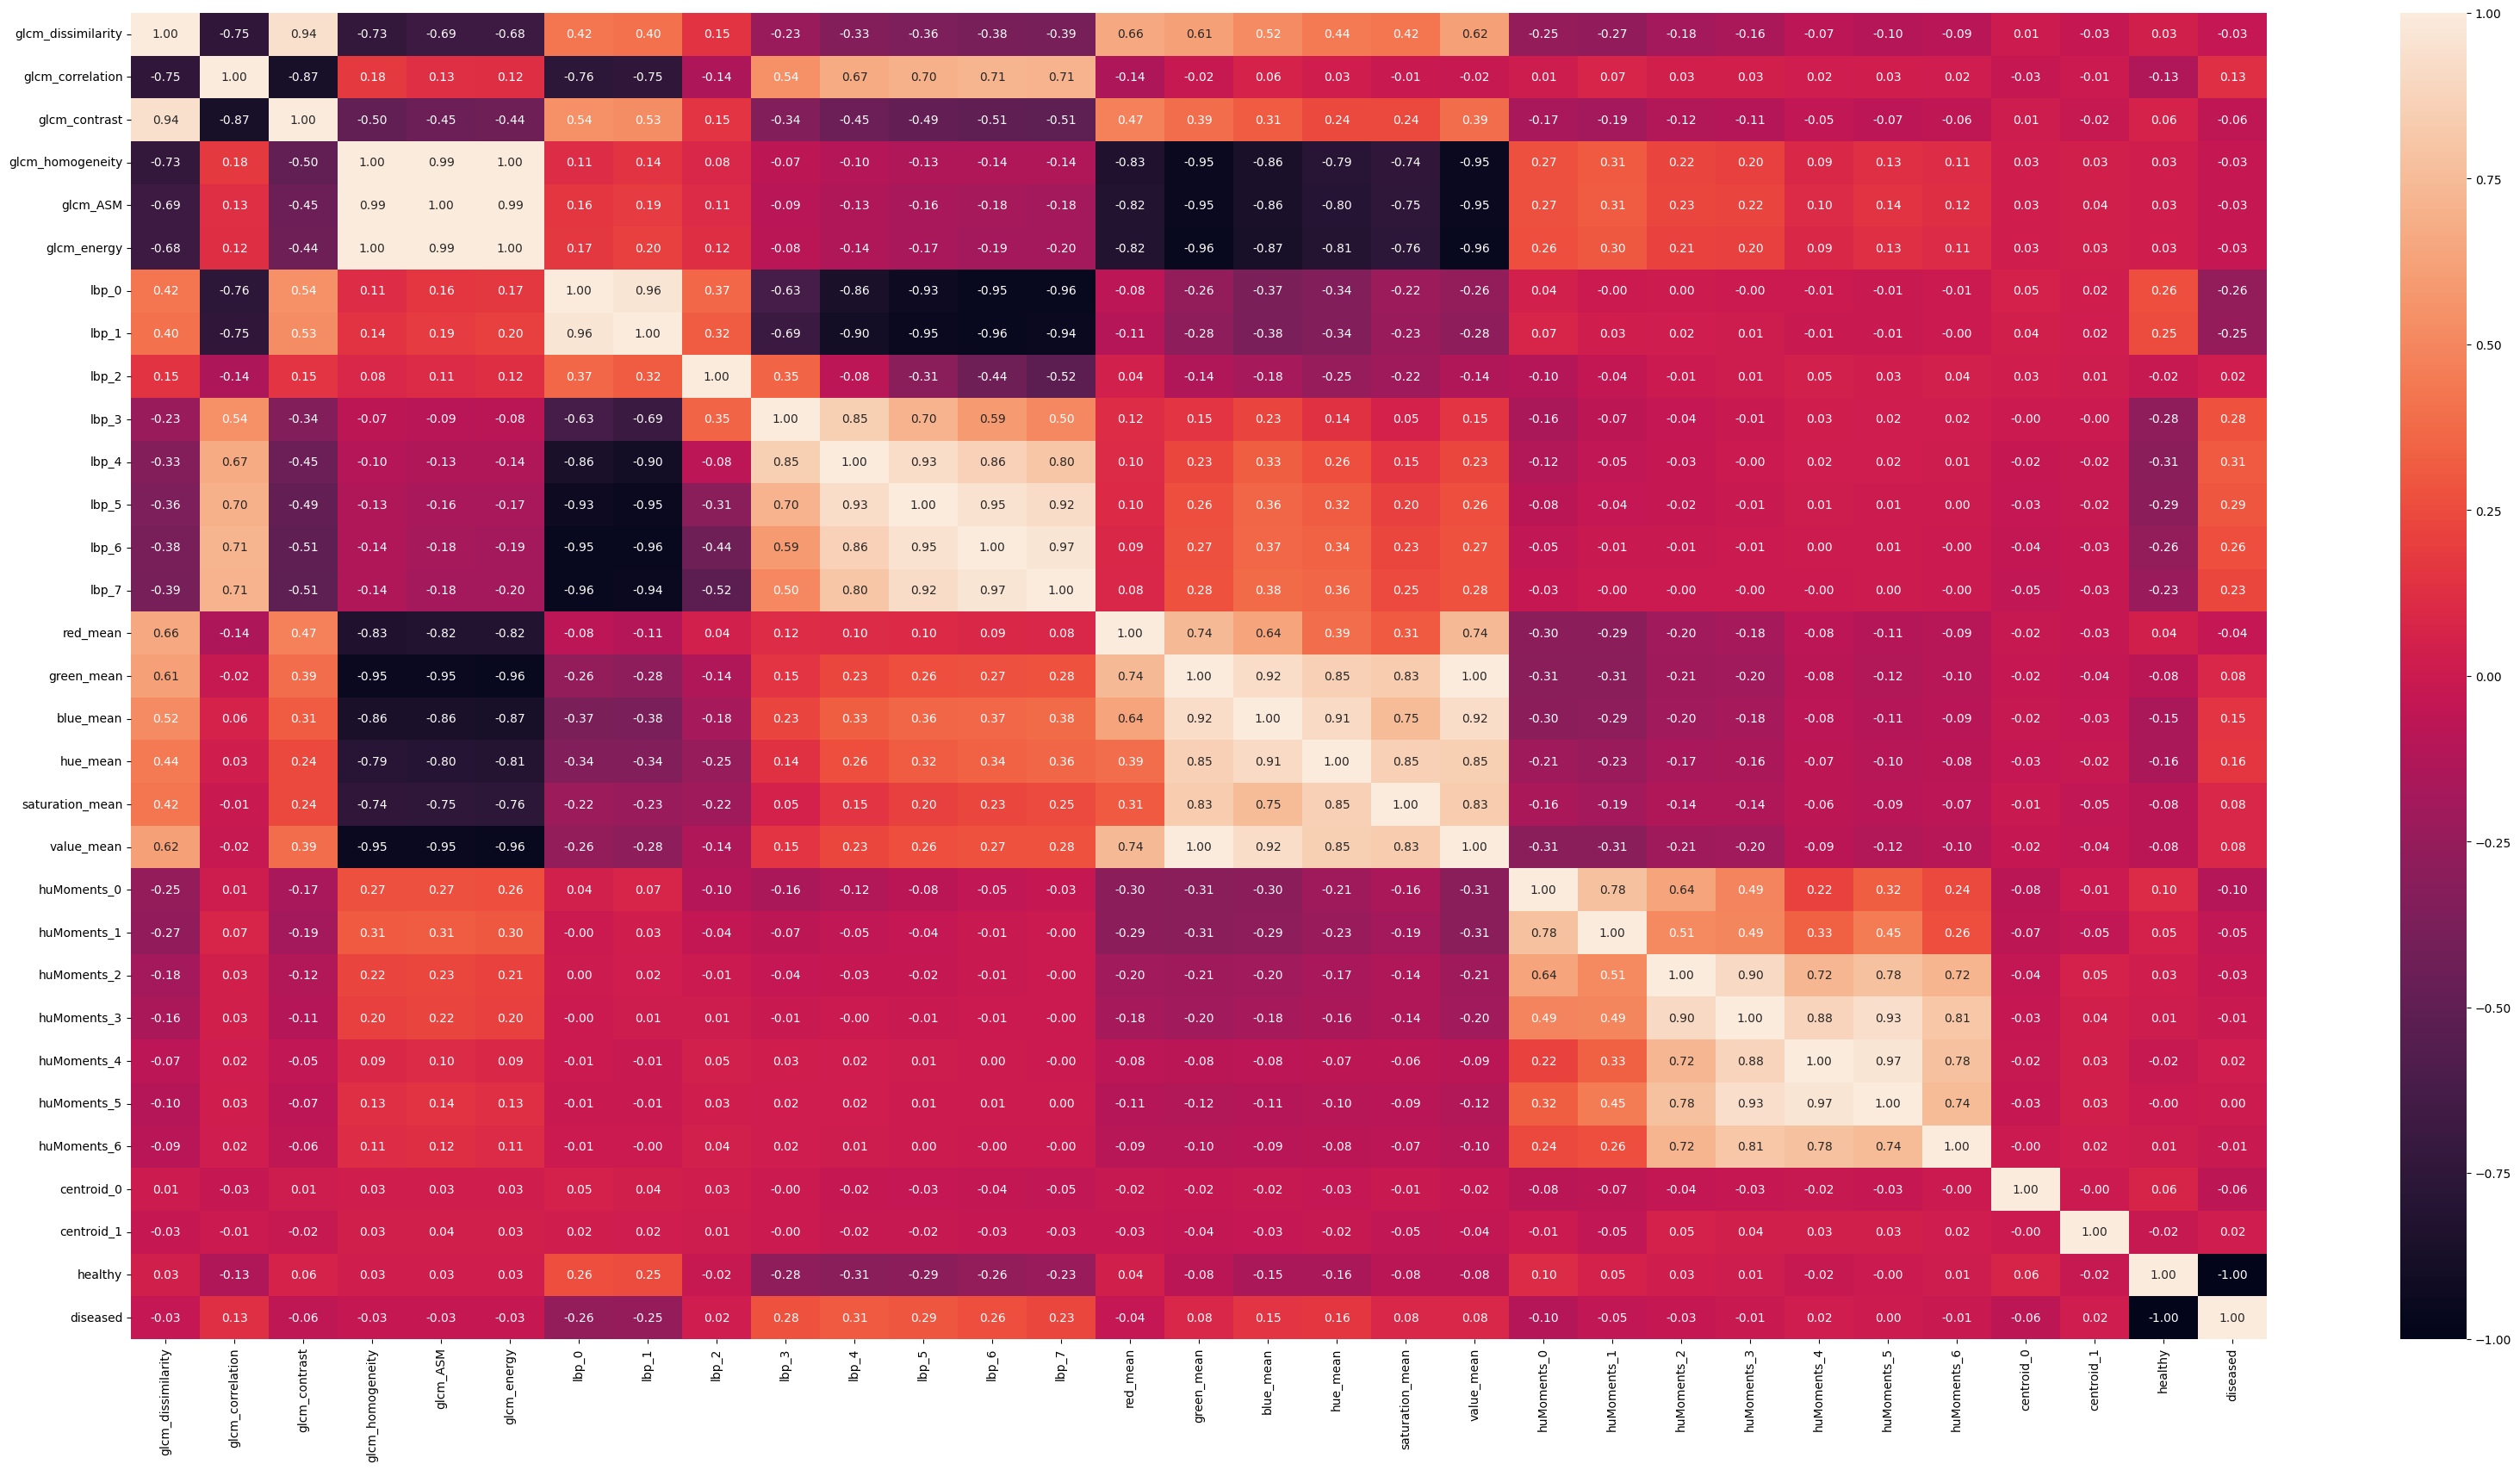

In [ ]:
# Correlation plot
import seaborn as sns
import matplotlib.pyplot as plt

corr = train_features_df1.corr()
plt.figure(figsize=(40, 20))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [ ]:
# Create new array of features including target label
columns = features.copy()
columns.append('healthy')
columns

['glcm_dissimilarity',
 'glcm_correlation',
 'glcm_contrast',
 'glcm_homogeneity',
 'glcm_ASM',
 'glcm_energy',
 'lbp_0',
 'lbp_1',
 'lbp_2',
 'lbp_3',
 'lbp_4',
 'lbp_5',
 'lbp_6',
 'lbp_7',
 'red_mean',
 'green_mean',
 'blue_mean',
 'hue_mean',
 'saturation_mean',
 'value_mean',
 'huMoments_0',
 'huMoments_1',
 'huMoments_2',
 'huMoments_3',
 'huMoments_4',
 'huMoments_5',
 'huMoments_6',
 'centroid_0',
 'centroid_1',
 'healthy']

In [ ]:
new_features = []

# search for features with positive correlation value
for feature in columns[:-1]:
    for label in columns[-1:]:
        if corr[feature][label] > 0:
            new_features.append(feature)

new_features

['glcm_dissimilarity',
 'glcm_contrast',
 'glcm_homogeneity',
 'glcm_ASM',
 'glcm_energy',
 'lbp_0',
 'lbp_1',
 'red_mean',
 'huMoments_0',
 'huMoments_1',
 'huMoments_2',
 'huMoments_3',
 'huMoments_6',
 'centroid_0']

### Preprocess Data Using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# preoceesing using standard scaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features_df[new_features])
# test_features = scaler.transform(test_features_df[new_features])

### Split Data Into Training & Testing

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

# labels = train[['healthy', 'multiple_diseases', 'rust', 'scab']]
labels = train[['healthy', 'diseased']]

# convert labels to 1D array
labels = np.argmax(np.array(labels), axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_features, labels, test_size=0.2, random_state=42)

## Model Selection

In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### SVM

In [ ]:
svm = SVC(kernel="rbf", C=1, gamma=0.1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7479452054794521
              precision    recall  f1-score   support

           0       0.62      0.21      0.31       100
           1       0.76      0.95      0.85       265

    accuracy                           0.75       365
   macro avg       0.69      0.58      0.58       365
weighted avg       0.72      0.75      0.70       365



### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.736986301369863
              precision    recall  f1-score   support

           0       0.54      0.25      0.34       100
           1       0.76      0.92      0.84       265

    accuracy                           0.74       365
   macro avg       0.65      0.59      0.59       365
weighted avg       0.70      0.74      0.70       365



### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7150684931506849
              precision    recall  f1-score   support

           0       0.47      0.27      0.34       100
           1       0.76      0.88      0.82       265

    accuracy                           0.72       365
   macro avg       0.61      0.58      0.58       365
weighted avg       0.68      0.72      0.69       365



### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7863013698630137
              precision    recall  f1-score   support

           0       0.71      0.37      0.49       100
           1       0.80      0.94      0.87       265

    accuracy                           0.79       365
   macro avg       0.76      0.66      0.68       365
weighted avg       0.77      0.79      0.76       365



## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {'classifier': [SVC()],
                    'classifier__kernel': ['rbf', 'linear'],
                    'classifier__C': [0.1, 1, 10, 100],
                    'classifier__gamma': [0.1, 1, 10, 100]
                },
                {'classifier': [RandomForestClassifier()],
                    'classifier__n_estimators': [10, 100, 1000],
                    'classifier__max_depth': [5, 10, 20, 50, 100]
                },
                {'classifier': [KNeighborsClassifier()],
                    'classifier__n_neighbors': [5, 10, 20, 50, 100]
                },
                {'classifier': [LogisticRegression()],
                    'classifier__penalty': ['l1', 'l2'],
                    'classifier__C': np.logspace(0, 4, 10)
                }
            ]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0, n_jobs=-1)  # Fit grid search
best_model = gridsearch.fit(X_train, y_train)

# print best model results
print(best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(X_test, y_test))
print(classification_report(y_test, best_model.predict(X_test)))

Pipeline(steps=[('classifier', LogisticRegression())])
The mean accuracy of the model is: 0.7863013698630137
              precision    recall  f1-score   support

           0       0.71      0.37      0.49       100
           1       0.80      0.94      0.87       265

    accuracy                           0.79       365
   macro avg       0.76      0.66      0.68       365
weighted avg       0.77      0.79      0.76       365



## Best Feature Visualization

[0.0671941  0.06938704 0.06066526 0.05875482 0.06147438 0.11430776
 0.10072797 0.07214364 0.06982896 0.0658762  0.06478925 0.05899284
 0.05959881 0.07625897]


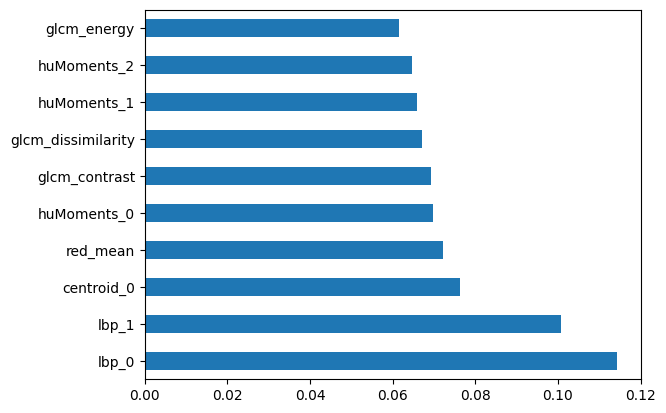

In [ ]:
# Show visualization to select best features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(train_features, labels)
print(model.feature_importances_)  # use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=train_features_df1[new_features].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()